## Double Neumann boundary conditions

We will now briefy investigate the effect of Neumann boundary conditions on both sides. Initially, this may be thought of as a typical problem: consider the case of heat flux through a body, where heat flux in and out of the body are given.

However, although it is clear that this is a physically reasonable problem formulation, solving this system leads to problems. We will start with investigating it using iterative methods.

In [3]:
#from IPython.core.display import HTML
#css_file = 'nre2_style.css'
#HTML(open(css_file, "r").read())

In [4]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt
import numpy as np

## Pure Neumann BC's with iterative solver

We will use a Gauss-Seidel iterative method to solve the problem. You should have written this function before, so simply cut-and-paste here:

In [6]:
# YOUR CODE HERE: 
# define the function for a single iteration of the Gauss-Seidel algorithm:
def gauss_seidel_iter(u, q, dx,k):
     
        
    for i in range(1,dx-1):
        u[i] = 0.5 * (u[i-1] + u[i+1] - (dx**2 * q[i]))
    return u
  

In the iteration loop, you now need to adjust your previous code to consider two Neumann Boundary conditions. As a first step, we will use the same flux $q = 0.1$ and a conductivity value of $k = 0.9$ on both sides. However, check the sign to make sure fluxes are oriented in the correct direction:

In [10]:
# Set number of nodes:
n = 10

# initialise array:  
u = np.ones(n)*15 

## YOUR CODE HERE:

# Parameters
q = 0.1*np.ones(n)
k = 0.9 
dx = 1/n


# Set BC on the array u
u[0] = k
u[-1] = k

for i in range(1,n):

        # perform iteration
        u_current = gauss_seidel_iter(u, q, dx,k)

print u_current



[  0.9  15.   15.   15.   15.   15.   15.   15.   15.    0.9]


Create a plot to visualise the results:

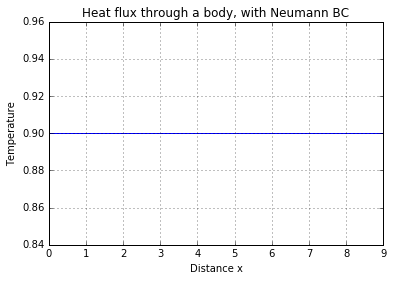

In [208]:
# YOUR CODE HERE: plot the results

plt.plot(u_current)
plt.title('Heat flux through a body, with Neumann BC')
plt.xlabel("Distance x")
plt.ylabel("Temperature")
plt.grid() 



Does the solution make sense?

*Hint*: if you did everything correctly, you should obtain a straight line with a gradient according to the defined boundary conditions  - so: what's the problem?

As a first step, we will investigate what happens when we change the initial values in the iterative solution routine:


In [209]:
## YOUR CODE HERE:
# Same as before, but use differnet initial values for u-array (say, u_init = 0)
u_init = 0



# initialise array:  
u = np.ones(n)*15 

# Parameters
n = 10
q = 0.1*np.ones(n)
k = 0.9 
dx = 1/n


# Set BC on the array u
u[0] = u_init
u[-1] = k


# store previous results for comparison:
u_init_1 = u.copy()

for i in range(1,n-1):

        # perform iteration
        u_current = gauss_seidel_iter(u, q, dx,k)

print u_current
print u_init_1

[ 0.   0.9  0.9  0.9  0.9  0.9  0.9  0.9  0.9  0.9]
[  0.   15.   15.   15.   15.   15.   15.   15.   15.    0.9]


Create a plot of the results, ideally in comparison to the previous solution:

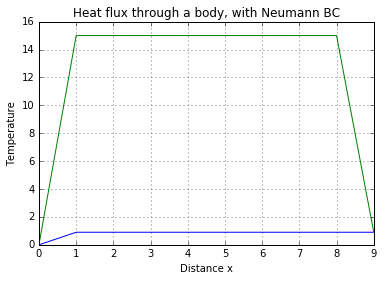

In [210]:
# YOUR CODE HERE: plot the results

plt.plot(u_current)
plt.plot(u_init_1)
plt.title('Heat flux through a body, with Neumann BC')
plt.xlabel("Distance x")
plt.ylabel("Temperature")
plt.grid() 


The problem should be obvious: depending on the initial value that we use in our iteration routine, we obtain a different result! Clearly not what we want: recall that the initial value is purely a computational construct (to start the iteration procedure) and has *no* physical meaning! Therefore: a different initial value should produce exactly the same result! But in this case, we obtain unlimited potential results, depending on the initial values!

To investigate this behaviour a bit more, let's see what happens when we apply *different* flux terms on both sides:

In [215]:
## YOUR CODE HERE: as before, but different flux values on both sides:

# Set number of nodes:
n = 10

# initialise array:  
u = np.ones(n)*15 

## YOUR CODE HERE:

# Parameters
q = 0.1*np.ones(n)
k = 0.9 
dx = 1/n


# Set BC on the array u
u[0] = k
u[-1] = k

for i in range(1,n-1):

        # perform iteration
        u_current = gauss_seidel_iter(u, q, dx,k)

print u_current



[ 0.9  0.9  0.9  0.9  0.9  0.9  0.9  0.9  0.9  0.9]


Again, create a plot of the results:

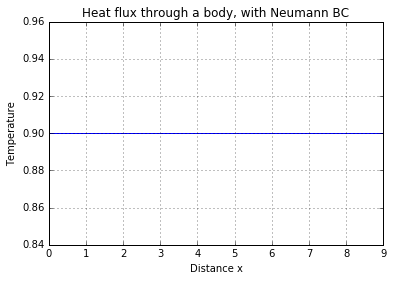

In [216]:
# YOUR CODE HERE: plot the results

plt.plot(u_current)
plt.title('Heat flux through a body, with Neumann BC')
plt.xlabel("Distance x")
plt.ylabel("Temperature")
plt.grid() 



We obtain a curved line - so this *could* make sense: the procedure tries to match fluxes on both sides. However, recall that we investigate this system:

$$\frac{d^2 u}{dx^2} = 0$$

So, a curved line is clearly not an admissible solution! Also, if you check the number of required iterations, you will see that you simply break after the maximum number of iterations is reached. Plus, the obtained values don't make any sense anymore. Clearly not possible.

## Pure Neumann BC's with matrix inversion method

Let's now see what happens when we try to solve the problem with a direct method where we don't require initial values - maybe it works out, then?

Recall the matrix equation when considering Neumann boundary conditions, it is now:

$A = \begin{bmatrix}
-2 & \color{red}{2} & 0 & 0 & \cdots & 0\\
1 & -2 & 1 &  0 & \cdots & 0\\
0 & 1 & -2 & 1 & \cdots & 0\\
\vdots & & & & & \vdots \\
0 & \cdots & 0 & 1 & -2 & 1 \\
0 & \cdots & 0 & 0 & \color{red}{2} & -2
\end{bmatrix}$

So, we only change two entries in this matrix. The system of algebraic equations that we want to solve is, as before:

$$A u = b$$ 

Let's see what happens when we try to invert this matrix:

In [9]:
# YOUR CODE HERE:

def tridiag_121(n):
    """
    Create a tridiagonal matrix of 1 -2 1 form of size n x n
    """
    # YOUR CODE HERE
    A = np.zeros(shape=(n,n))
    i,j = np.indices(A.shape)
    A[i==j] = -2.
    A[i==j-1] = 1.
    A[i==j+1] = 1.
    return  A


A = tridiag_121(10)


A


[[-2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.]]


You should now get an error that nicely enapsulates the entire problem: *we obtain a singular matrix*, and this matrix can not be inverted!

This is an interesting example of how a physically unreasonable problem (the system is underdetermined with two flux boundary conditions) translates into a mathematical problem that can not be solved!

Of course, we can easily see the problem from the matrix determinant, as well:

In [ ]:
np.linalg.det(A)

The determinant is zero, the matrix singular - and therefore not invertible. 

Try now what happens when you change the values from 2 to something very close (say, 1.9999). The determinant will not be zero anymore and the matrix is invertible. But what happens?

In [ ]:
# YOUR CODE HERE:


The matrix inversion should now be successful - but what does the result look like?

In [ ]:
# YOUR CODE HERE: plot the results



We now obtain a solution, but what about the values? Investigate this system a bit more by checking the matrix condition number:

In [ ]:
np.linalg.cond(A)

The matrix condition number is very high, and this means that the matrix is highly sensitive to small errors! Note that the matrix condition number is a property of the matrix itself and not (even) related to numerical round-off errors! Matrix inversions with high condition numbers are extermely unreliable and the result therefore bascially useless.

This short side-track was a small inverstigation on how a system that is so incredibly simple (soving the 1-D Laplace equation) can lead to interesting problems - but also insights into sensitivities to initial conditions and to matrix inversions.

## Fixing the Neumann BC problem

What can we do if we still want to apply two Flux boundary conditions? As we saw before, we obtain bascially an infinte set of parallel lines as solution. But if we define a single value, then we should obtain a single result!

So, we can simply add a method to fix the value at a point. Note: we can now not anymore use the direct Matrix inversion approach of before (*why*?). However, as one option, we can simply extend an iterative solver!

Have a go here and see if you can get a meaningful result:

In [ ]:
## YOUR CODE HERE:



In [ ]:
# YOUR CODE HERE: plot the results



You should now obtain a stable solution that is independent of the initial values in the $u$ array!

Of course, in this simple 1-D case, this is a somewhat oversimplified (and overconstrained) because it is only a 1-D problem. However, the extension to more complex problems is logical and this type of problem can well occur in many practical circumstances!